In [0]:
#EJERCICIO DE KMEANS
#Ejercicio de clase -> Este modelo se usa para localizar grupos ;)
#DB de vinos que está en sklearn :D
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

wine = datasets.load_wine() # Cargamos wine o vino

In [2]:
#Separando
X_wine = wine.data
Y_wine = wine.target

x = pd.DataFrame(wine.data, columns =wine.feature_names)
y = pd.DataFrame(wine.target, columns = ['Target'])
x.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Text(0, 0.5, 'proline')

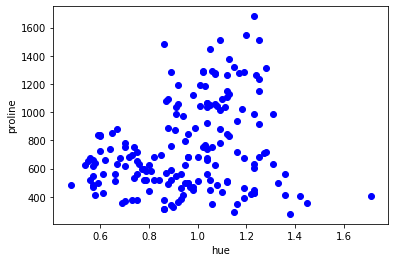

In [3]:
#Escogeremos las caracteristicas para encontrar el centroide
feature2 = 'proline'
feature1 = 'hue'

#Visualizar los datos
plt.scatter(x[feature1],x[feature2], c='blue')
#Sóólo la parte visual de las etiquetas
plt.xlabel(feature1,fontsize=10)
plt.ylabel(feature2,fontsize=10)

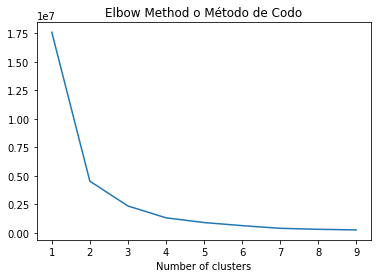

In [4]:
#méétodo de codo para saber el núúmero exacto de cluster

from sklearn.cluster import KMeans
arregloAux = [] #Arreglo auxiliar para guardar cada caso de clusters

for i in range(1, 10):#Para iterar cada uno de los casos
    modelo = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    modelo.fit(x)
    arregloAux.append(modelo.inertia_)#Evaluación de los puntos

#Impresión de datos
plt.plot(range(1, 10), arregloAux)
plt.title('Elbow Method o Método de Codo') #Es un método heurístico
plt.xlabel('Number of clusters')
plt.show()

In [7]:
#Construccion del modelo y la evaluacióón de los K-Means

#Designar el núúmero de clusters y la cantidad de iteraciones
model = KMeans(n_clusters = 2, max_iter = 1000)
model.fit(x)#Entrenar el modelo
y_labels = model.labels_ #Vamos a asignar lo obtenido
y_kmeans = model.predict(x)
print('Predicciones', y_kmeans)

Predicciones [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
from sklearn import metrics
accuracy = metrics.adjusted_rand_score(Y_wine,y_kmeans)
print(accuracy)

0.3694075388574537


Text(0, 0.5, 'proline')

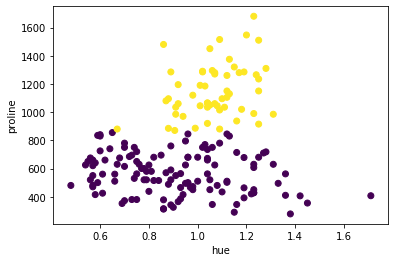

In [10]:
#Parte grafica
plt.scatter(x[feature1], x[feature2], c = y_kmeans)
plt.xlabel(feature1,fontsize=10)
plt.ylabel(feature2,fontsize=10)